    Discription  Page 1  Page 2  Page 3  Page 4
0                 164.0   178.0   175.0   155.0
1                 172.0   191.0   193.0   166.0
2                 177.0   182.0   171.0   164.0
3                 156.0   185.0   163.0   170.0
4                 195.0   177.0   176.0   168.0
5         MEANS   172.8   182.6   175.6   164.6
6  GENERAL MEAN     NaN     NaN     NaN   173.9 




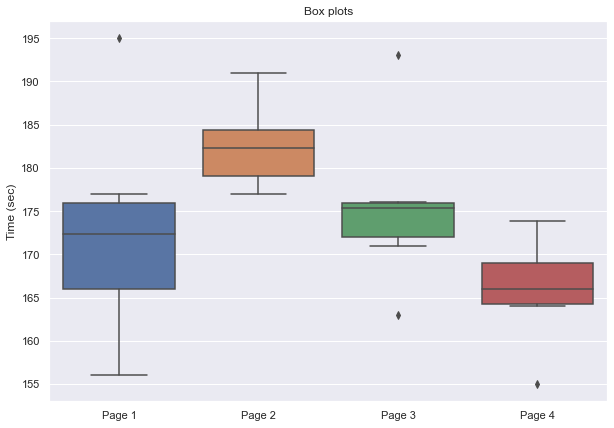

Boxplots discription: plots are demonstrates significant difference between web-pages visit time.

Observed variance: 41.57


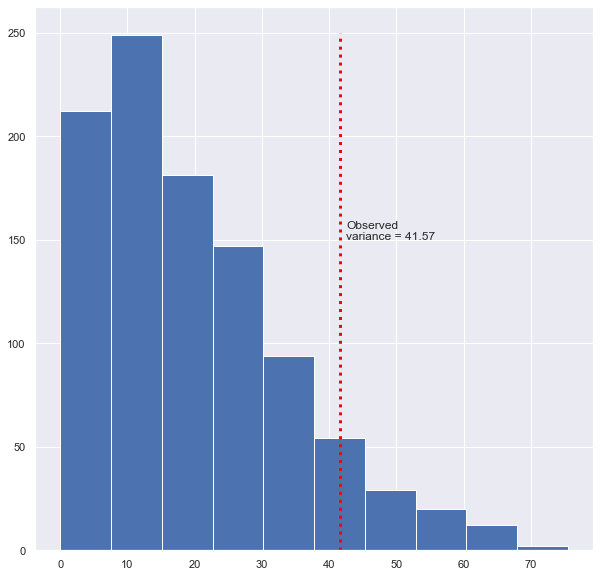

p-Value = 0.0880


In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Data about view time of pages (sec)
pages = ['Page 1', 'Page 2', 'Page 3', 'Page 4']
times = [[164, 172, 177, 156, 195], [178, 191, 182, 185, 177], [175, 193, 171, 163, 176], [155, 166, 164, 170, 168]]

df = pd.DataFrame({pages[i]:times[i] for i in range(len(times))})
df = df.append({pages[i]:np.mean(df[pages[i]]) for i in range(len(times))}, ignore_index=True)
df = df.append({'Page 4': np.mean(df.iloc[5])}, ignore_index=True)
df.insert(loc=0, column='Discription', value=['','','','','','MEANS','GENERAL MEAN'])
print(df, 2*'\n')

plt.figure(figsize=(10, 7))
plt.title('Box plots')
sns.boxplot(data=df)
plt.ylabel('Time (sec)')
plt.show()
print('Boxplots discription: plots are demonstrates significant difference between web-pages visit time.\n')

"""
For check this results we can use Dispersion analyse:
    1. Unite all data
    2. Make 4 random samples with 5 values
    3. Calculate and record the mean value for each sample
    4. Calculate and record the dispersion of this means
    5. Repeat steps 2-4 for many times (1000 for example)
"""

means = df.iloc[5]
means = means[1:]
observed_variance = np.power(np.std(means), 2).round(2)
print(f'Observed variance: {observed_variance}')


values = []
df_copy = df.copy()
columns = df_copy.columns
df_copy = df_copy.drop(columns[0], axis=1)
df_copy = df_copy.drop([5, 6], axis=0)
for column in df_copy.columns:
    for value in df_copy[column].values:
        values.append(value)
df_val = pd.Series(values)


def perm_func(df, n):
    N = set(range(len(df)))
    ind_1 = set(random.sample(list(N), n))
    ind_2 = set(random.sample(list(N-ind_1), n))
    ind_3 = set(random.sample(list(N-ind_1-ind_2), n))
    ind_4 = set(random.sample(list(N-ind_1-ind_2-ind_3), n))
    mn1 = np.mean(df.loc[ind_1])
    mn2 = np.mean(df.loc[ind_2])
    mn3 = np.mean(df.loc[ind_3])
    mn4 = np.mean(df.loc[ind_4])
    return np.power(np.std([mn1, mn2, mn3, mn4]), 2).round(2)


R = 1000
perm_variance = [perm_func(df_val, 5) for _ in range(R)]


plt.figure(figsize=(10, 10))
plt.hist(perm_variance, bins=10)
plt.vlines(observed_variance, ymin=0, ymax=250, lw=3, colors='red', ls=':')
plt.text(observed_variance+1, 150, f'Observed\nvariance = {observed_variance}')
plt.show()


p_Value = np.mean([var>observed_variance for var in perm_variance])
print(f'p-Value = {p_Value:.4f}')

Observed means: [172.8 182.6 175.6 164.6]
Observed variance: 41.57


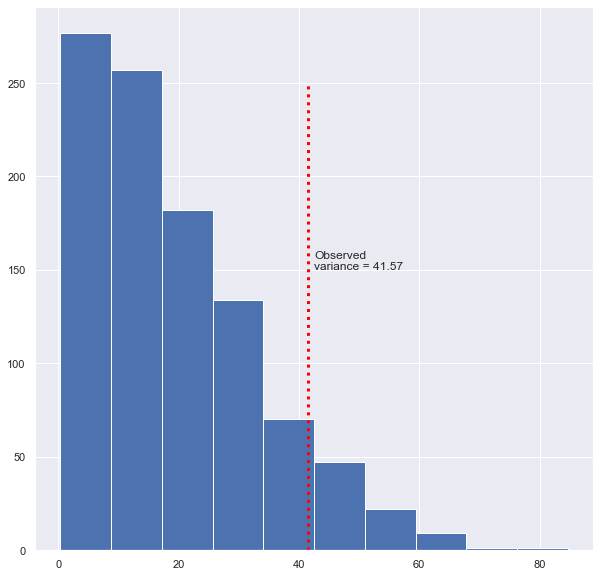

p-val: 0.09


In [8]:
# Alternative solution

import pandas as pd
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_csv('/Users/ivankudravcev/Studying/Data/four_sessions.csv', sep=';')
obs_var = df.groupby('Page').mean().values.var()
print(f"Observed means: {df.groupby('Page').mean().values.ravel()}")
print(f'Observed variance: {obs_var:.2f}')

def per_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().values.var()

R = 1000
per_var = [per_test(df) for _ in range(R)]

plt.figure(figsize=(10, 10))
plt.hist(per_var, bins=10)
plt.vlines(obs_var, ymin=0, ymax=250, lw=3, colors='red', ls=':')
plt.text(obs_var+1, 150, f'Observed\nvariance = {obs_var:.2f}')
plt.show()


p_val = np.mean([var > obs_var for var in per_var])
print(f'p-val: {p_val:.2f}')